In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pickle

In [2]:
#Loading the dataset
df = pd.read_csv('kidney.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.shape

(400, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [7]:
#Dropping the unecesarry column
df.drop('id', axis = 1, inplace = True)

In [8]:
#Checking missing value
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
#Renaming the columns
df.rename(columns = {"age":"Age", "bp":"blood pressure", "sg":"specific gravity", "al":"albumin", "su":"sugar",
                       "rbc":"red blood cells", "pc":"pus cell", "pcc":"pus cell clumps","ba":"bacteria", "bgr":"blood glucose random",
                       "bu":"blood urea", "sc":"serum creatinine", "sod":"sodium", "pot":"potassium", "hemo":"haemoglobin",
                       "pcv":"packed cell volume", "wc":"white blood cell count", "rc":"red blood cell count",
                       "htn":"hypertension", "dm":"diabetes mellitus", "cad":"coronary artery disease", "appet":"appetite",
                       "pe":"pedal edema", "ane":"anemia",} , inplace = True)

In [10]:
df.columns

Index(['Age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'classification'],
      dtype='object')

In [11]:
#Checking Unique values in Classification column
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

### ckd = chronic kidney disease

In [12]:
df.classification=df.classification.replace("ckd\t","ckd") 

In [13]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [14]:
df['classification'] = df['classification'].replace(['ckd','notckd'], [1,0])

In [15]:
# Checking the counts of label categories
classification = df['classification'].value_counts(normalize = True)
classification

1    0.625
0    0.375
Name: classification, dtype: float64

### 1 means suffering with the disease, 0 means not suffering with the disease 

## Data Preprocessing
### Dropping NaN values:

In [16]:
df = df.dropna(axis = 0)

In [17]:
df.isna().sum()

Age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classification             0
dtype: int64

In [18]:
df.head()

,Age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [19]:
df.index = range(0,len(df),1)
df.head()

,Age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


### label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [23]:
df.head()


,Age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,1
1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,1
2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,1
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,1
4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,1


### HeatMap

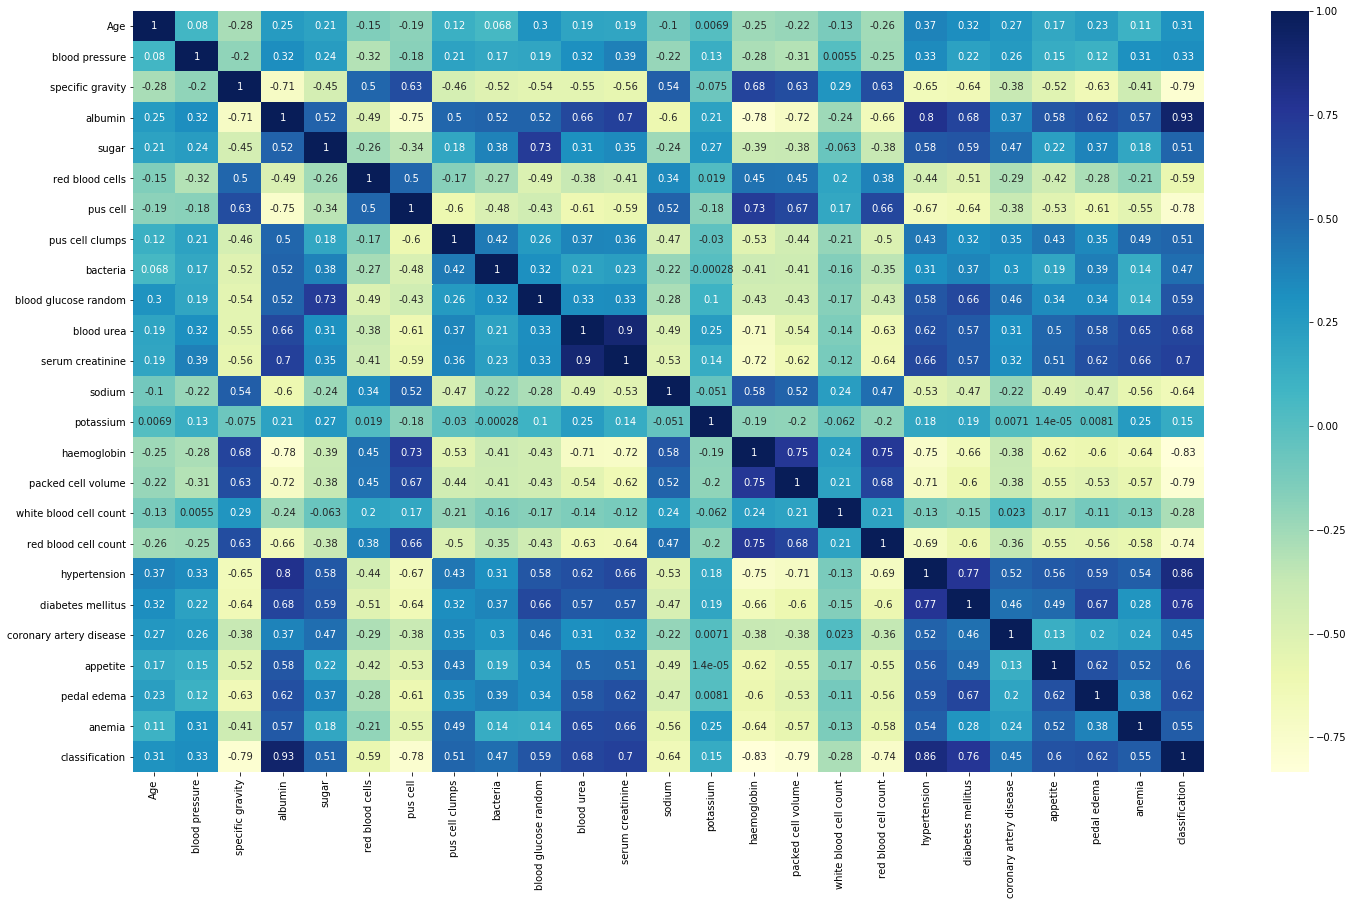

In [24]:
plt.figure(figsize=(24,14))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

* Here we clearly see that 'Packed Cell Volume(PCV) & 'Heamoglobin' feature has 75% **Multicollinearity**.
* so Iam removing One feature ie.packed cell volume.

In [25]:
df.drop('packed cell volume', axis=1, inplace=True)

In [26]:
df.head()

,Age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,42,14,1,0,0,1,1,1,1
1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,9.5,11,12,1,1,0,1,0,1,1
2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,10.8,25,13,1,1,0,1,1,0,1
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,5.6,8,2,1,1,1,1,1,0,1
4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,7.7,63,7,1,1,1,1,1,1,1


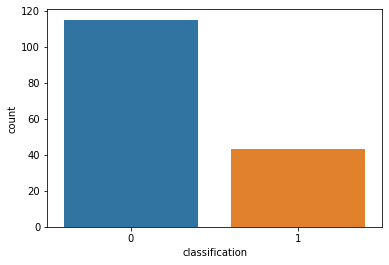

In [27]:
# Target feature:
sns.countplot(df['classification'])

### Feature Selection

In [28]:
X = df.drop('classification', axis=1)
Y = df['classification']

In [29]:
X.head()

,Age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,potassium,haemoglobin,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,2.5,11.2,42,14,1,0,0,1,1,1
1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,3.7,9.5,11,12,1,1,0,1,0,1
2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,4.2,10.8,25,13,1,1,0,1,1,0
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,6.4,5.6,8,2,1,1,1,1,1,0
4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,5.2,7.7,63,7,1,1,1,1,1,1


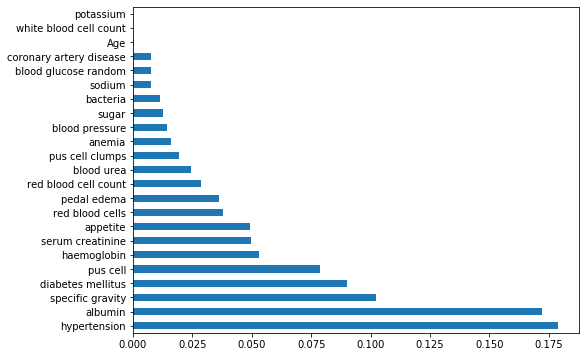

In [31]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [32]:
ranked_features.nlargest(8).index

Index(['hypertension', 'albumin', 'specific gravity', 'diabetes mellitus',
       'pus cell', 'haemoglobin', 'serum creatinine', 'appetite'],
      dtype='object')

In [33]:
X = df[['hypertension', 'albumin', 'specific gravity', 'diabetes mellitus',
        'pus cell', 'haemoglobin', 'serum creatinine', 'appetite']]
X.head()

,hypertension,albumin,specific gravity,diabetes mellitus,pus cell,haemoglobin,serum creatinine,appetite
0,1,4.0,1.005,0,0,11.2,3.8,1
1,1,2.0,1.020,1,0,9.5,7.2,1
2,1,3.0,1.010,1,0,10.8,2.7,1
3,1,3.0,1.010,1,0,5.6,4.1,1
4,1,2.0,1.015,1,0,7.7,3.9,1


In [34]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [40]:
Y.value_counts(normalize=True)*100

0    72.78481
1    27.21519
Name: classification, dtype: float64

### Performing Train Test split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.3,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)

(110, 8)
(48, 8)


## Fitting the Model

In [49]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier()
Random = RandomForest.fit(X_train,Y_train)

# Predictions:
Y_pred = Random.predict(X_test)

## Model Evaluation

In [50]:
from sklearn.metrics  import accuracy_score
from sklearn.metrics import f1_score

In [51]:
print('Random Forest Classifer:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred) * 100))
print('F1 score:', round(f1_score(Y_test, Y_pred) * 100))

Random Forest Classifer:
Accuracy score: 100
F1 score: 100


In [53]:
#Creating a pickle file for saving our model
filename ='Kidney_Disease_Prediction.pkl'
model =pickle.dump(Random, open(filename, 'wb'))